In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [39]:
file1 = pd.read_csv('data/KMeans/1인 가구 가중치.csv', encoding='cp949')
file2 = pd.read_csv('data/KMeans/2인 가구 가중치.csv', encoding='cp949')
file3 = pd.read_csv('data/KMeans/4인 가구 가중치.csv', encoding='cp949')
file1

,X좌표(경도),Y좌표(위도),합계
0,126.76245,37.41205,0
1,126.76245,37.41615,0
2,126.76245,37.42025,0
3,126.76245,37.42435,0
4,126.76245,37.42845,0
...,...,...,...
5394,127.18135,37.69905,0
5395,127.18135,37.70315,0
5396,127.18135,37.70725,0
5397,127.18135,37.71135,0


In [44]:
n_file1 = pd.read_csv('data/KMeans/1인 가구 가중치(-3~3).csv', encoding='cp949')
n_file2 = pd.read_csv('data/KMeans/2인 가구 가중치(-3~3).csv', encoding='cp949')
n_file3 = pd.read_csv('data/KMeans/4인 가구 가중치(-3~3).csv', encoding='cp949')

In [40]:
file2[file2['합계']==0]

,X좌표(경도),Y좌표(위도),합계
0,126.76245,37.41205,0
1,126.76245,37.41615,0
2,126.76245,37.42025,0
3,126.76245,37.42435,0
4,126.76245,37.42845,0
...,...,...,...
5394,127.18135,37.69905,0
5395,127.18135,37.70315,0
5396,127.18135,37.70725,0
5397,127.18135,37.71135,0


In [30]:
data1 = file1[file1['합계']!=0].reset_index(drop=True)
data2 = file2[file2['합계']!=0].reset_index(drop=True)
data3 = file3[file3['합계']!=0].reset_index(drop=True)

In [45]:
df1 = n_file1[n_file1['합계']!=0].reset_index(drop=True)
df2 = n_file2[n_file2['합계']!=0].reset_index(drop=True)
df3 = n_file3[n_file3['합계']!=0].reset_index(drop=True)

In [49]:
data1['합계'].unique()

array([   4,   18,    2,    6,   10,   12,   11,    7,    9,  163,   21,
         25,    1,    3,   88,  250,  314,  130,  289,   85,   42,    8,
         16,   19,  104,   15,   38,  245,  190,   75,   58,   17,   44,
         22,   47,   24,   49,   37,   73,   80,   74,  132,   14,   65,
         78,   13,  201,  125,  110,  398,  654,    5,   32,   92,   60,
         31,  154,  178,  146,  215,   79,  232,  229,  736,   46,   98,
         36,   43,   91,  177,  118,  144,  265,  165,  290,  272,   76,
        216,  644,  179,  271,   63,   20,  205,  138,   67,   33,   89,
        150,  354,   54,  350,   48,   40,  302,  147,   70,   34,   61,
        123,  153,  214,   51,  120,  408,  235,  101,  142,  133,  197,
        171,  114,   53,  122,  176,  111,  199,   94,  260,  220,  189,
         68,  222,  251,  227,   72,   39,  242,  218,  210,  160,   83,
         52,   55,   95,  141,  124,  158,   66,   90,  180,  106,  303,
        351,   71,   28,  149,   87,  252,  369,  2

In [50]:
df1['합계'].unique()

array([   1,  -12,   -1,   -3,   -2,   -5,   -4,   -6,  -10,  -18,  -86,
         -8,  -50, -116, -139,  -59, -143,  -29,  -15,  -11,  -24,  -46,
        -19, -100, -107,  -33,  -32,  -13,  -17,  -25,   -9,  -20,  -22,
        -26,  -31,  -43,  -69,  -28,   -7,  -90,    3,  -52, -196, -312,
        -61,  -74,  -77,  -97,  -35, -101,  -92, -347,  -23,  -48,  -58,
        -41,  -81,  -56,  -57, -125, -145, -127, -114, -313,  -73, -128,
        -27,  -82,  -75,  -21,  -80,  -60, -156,  -76, -178,  -72,  -30,
       -124,  -14,  -84,  -36, -210, -104,  -40, -109,  -93,  -66,  -37,
        -70,  -42,  -95,  -68, -118, -105,  -47, -121, -106, -112,  -39,
        -38,  -53,  -79,  -34, -135, -201, -108, -110, -189, -140,  -63,
        -16,  -49,  -51, -177, -215, -153,  -85, -129, -134, -142, -103,
        -64, -185,  -99, -151,  -91, -138,  -55,  -83, -180, -130, -218,
       -164, -136, -232,  -71,  -98, -120, -197, -188,  -94,  -54, -213,
       -337, -131, -123,  -65,  -88, -102, -133, -2

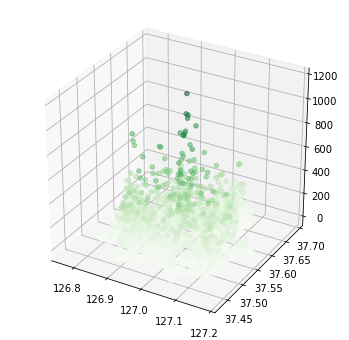

In [31]:
sample_size = 100

# xs = np.cumsum(np.random.normal(file['X좌표(경도)'].min(), file['X좌표(경도)'].max(), sample_size))
# ys = np.cumsum(np.random.normal(file['Y좌표(위도)'].min(), file['Y좌표(위도)'].max(), sample_size))
# zs = np.cumsum(np.random.normal(file['합계'].min(), file['합계'].max(), sample_size))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1['X좌표(경도)'], data1['Y좌표(위도)'], data1['합계'], c = data1['합계'], s= 20, alpha=0.5, cmap=plt.cm.Greens)

plt.show()

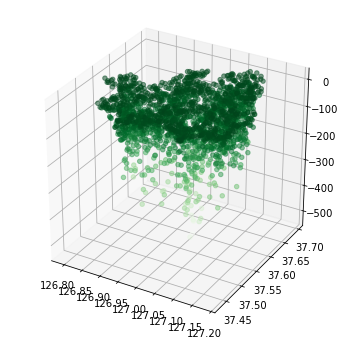

In [46]:
sample_size = 100

# xs = np.cumsum(np.random.normal(file['X좌표(경도)'].min(), file['X좌표(경도)'].max(), sample_size))
# ys = np.cumsum(np.random.normal(file['Y좌표(위도)'].min(), file['Y좌표(위도)'].max(), sample_size))
# zs = np.cumsum(np.random.normal(file['합계'].min(), file['합계'].max(), sample_size))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['X좌표(경도)'], df1['Y좌표(위도)'], df1['합계'], c = df1['합계'], s= 20, alpha=0.5, cmap=plt.cm.Greens)

plt.show()

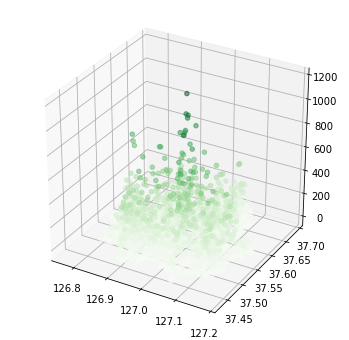

In [32]:
sample_size = 100

# xs = np.cumsum(np.random.normal(file['X좌표(경도)'].min(), file['X좌표(경도)'].max(), sample_size))
# ys = np.cumsum(np.random.normal(file['Y좌표(위도)'].min(), file['Y좌표(위도)'].max(), sample_size))
# zs = np.cumsum(np.random.normal(file['합계'].min(), file['합계'].max(), sample_size))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['X좌표(경도)'], data2['Y좌표(위도)'], data2['합계'], c = data2['합계'], s= 20, alpha=0.5, cmap=plt.cm.Greens)

plt.show()

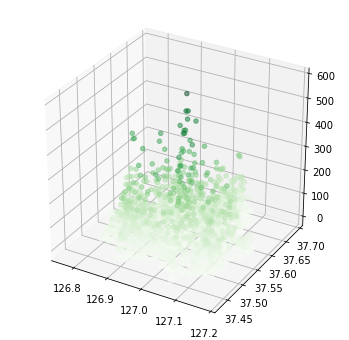

In [33]:
sample_size = 100

# xs = np.cumsum(np.random.normal(file['X좌표(경도)'].min(), file['X좌표(경도)'].max(), sample_size))
# ys = np.cumsum(np.random.normal(file['Y좌표(위도)'].min(), file['Y좌표(위도)'].max(), sample_size))
# zs = np.cumsum(np.random.normal(file['합계'].min(), file['합계'].max(), sample_size))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3['X좌표(경도)'], data3['Y좌표(위도)'], data3['합계'], c = data3['합계'], s= 20, alpha=0.5, cmap=plt.cm.Greens)

plt.show()

In [34]:
data3

,X좌표(경도),Y좌표(위도),합계
0,126.76245,37.55555,1
1,126.76835,37.55555,14
2,126.77425,37.55145,1
3,126.78015,37.54735,1
4,126.78015,37.55555,1
...,...,...,...
2048,127.17545,37.56375,81
2049,127.17545,37.56785,47
2050,127.17545,37.57195,2
2051,127.18135,37.55965,15


In [29]:
file2[file2['합계']==0]

,X좌표(경도),Y좌표(위도),합계
0,126.76245,37.41205,0
1,126.76245,37.41615,0
2,126.76245,37.42025,0
3,126.76245,37.42435,0
4,126.76245,37.42845,0
...,...,...,...
5394,127.18135,37.69905,0
5395,127.18135,37.70315,0
5396,127.18135,37.70725,0
5397,127.18135,37.71135,0


In [42]:
data3['합계'].unique()

array([  1,  14,   3,   2,   5,   6,  13,  17,  27, 104,  21,  22,   4,
        58, 143, 168,  78, 165,  56,  12,  42,  15, 138, 125,  55,  38,
        28,  37,  29,  35,  32,  26,  57,  33,  51,  49,  63,  95,   8,
        10,  47,  69,  20, 119,  82, 219,  18, 335,   7,  34,  75,  23,
        62,  84, 101,  73, 118,  40, 135, 369,   9, 117,  67, 147,  96,
       172, 161,  43, 136, 350,  94, 144,  48, 120,  97, 107,  52,  11,
        50, 102,  74, 192,  93,  25, 210,  19, 194,  31,  39,  54, 141,
        68, 127,  45, 234, 126,  30,  91, 124, 110,  83, 100,  59,  61,
       128,  98, 142, 131,  66, 137, 177, 129,  53,  99,  41,  79,  24,
       178, 213, 116, 133,  90, 140, 222,  36, 151,  70,  89,  44,  64,
        86, 209, 233, 156, 169, 115, 152, 160,  76, 112, 176, 132, 121,
       205, 171, 114, 166,  92, 106, 251, 189, 159, 261, 122, 105, 103,
       231, 220,  46,  16, 246,  80, 377, 148, 113, 157,  88,  65, 262,
       174, 134, 163, 188, 109, 139, 149,  81, 270, 264, 379, 40

In [43]:
data3[data3['합계']==1]

,X좌표(경도),Y좌표(위도),합계
0,126.76245,37.55555,1
2,126.77425,37.55145,1
3,126.78015,37.54735,1
4,126.78015,37.55555,1
5,126.78015,37.55965,1
...,...,...,...
1995,127.14595,37.51455,1
2008,127.14595,37.56785,1
2035,127.16955,37.54325,1
2041,127.16955,37.56785,1
